
## Project Overview

This analysis explores the Superstore dataset, a comprehensive retail transactions dataset containing ~10,000 sales records across the United States (2014–2018). The goal is to uncover actionable insights into sales performance, profitability drivers, and regional trends to inform strategic decision-making.

### Data Sources

**[Superstore Dataset (Kaggle)](https://www.kaggle.com/datasets/vivek468/superstore-dataset-final)**

  The primary dataset contains metadata about Order details, People and Regions.


|Column|Meaning|
|:-----|:-----|
|Row ID| Unique ID for each row|
|Order ID| Unique Order ID for each Customer|
|Order Date| Order Date of the product|
|Ship Date| Shipping Date of the Product|
|Ship Mode| Shipping Mode specified by the Customer|
|Customer ID| Unique ID to identify each Customer|
|Customer Name| Name of the Customer|
|Segment| The segment where the Customer belongs|
|Country| Country of residence of the Customer|
|City| City of residence of of the Customer|
|State| State of residence of the Customer|
|Postal Code| Postal Code of every Customer|
|Region| Region where the Customer belong|
|Product ID| Unique ID of the Product|
|Category| Category of the product ordered|
|Sub-Category| Sub-Category of the product ordered|
|Product Name| Name of the Product|
|Sales| Sales of the Product|
|Quantity| Quantity of the Product|
|Discount| Discount provided|
|Profit| Profit/Loss incurred|

## Data Preprocessing

1. Converted Order Date and Ship Date to datetime format for time-series analysis.
2. Verified data integrity: No missing values detected in key fields (Sales, Profit, Region, etc.).
3. EDA and Insights

## Scope of Analysis

1. **Descriptive Statistics:**
- Distribution of sales, profit, and discounts.
- Key metrics segmented by region, product category, and customer segment.

2. **Trend Analysis:**
- Monthly/quarterly sales and profit trends.
- Year-over-year growth rates.
  
3. **Correlation Insights:**
- Relationships between sales, quantity, discounts, and profit (e.g., discounts negatively impact profitability).

4. **Geospatial Performance:**
- Regional comparisons (profit and sales).
- State-level sales hotspots.
  
5. **Product Hierarchy:**
   
- High/low-performing categories and sub-categories.
- Margin analysis by product.
  
## Key Tools Used

- Python Libraries: `pandas`, `matplotlib`, `seaborn`, `datetime.`
- Visualizations: Heatmaps, bar plots, time-series line charts

## Business Context

This EDA addresses critical questions:

- Which regions/products drive the most profit?
- Are discounts effectively increasing sales volume?
- How do discounts impact profitability?

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

sup = pd.read_excel('Sample - Superstore.xls')

In [118]:
sup.shape

(9994, 21)

In [116]:
sup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [120]:
sup.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [41]:
sup['Order Date'] = pd.to_datetime(sup['Order Date'])
sup['Ship Date'] = pd.to_datetime(sup['Ship Date'])

In [67]:
sup.duplicated().sum()

0

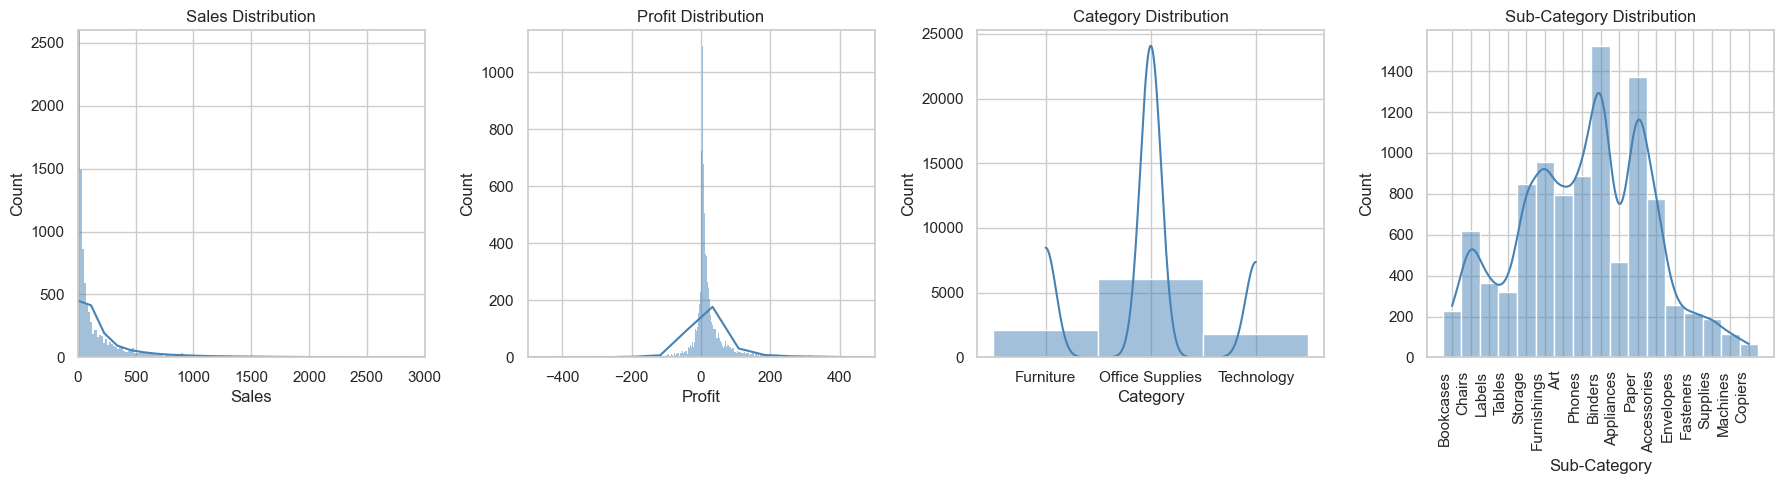

In [138]:
fig, axs = plt.subplots(1, 4, figsize=(18, 5))

# Distribution of Sales
sns.histplot(data=sup, x='Sales', kde=True, ax=axs[0], color='steelblue')
axs[0].set_title('Sales Distribution')
axs[0].set_xlabel('Sales')
axs[0].set_ylabel('Count')
axs[0].set_xlim(-1, 3000)
axs[0].set_ylim(-1, 2600)

# Distribution of Profit
sns.histplot(data=sup, x='Profit', kde=True, ax=axs[1], color='steelblue')
axs[1].set_title('Profit Distribution')
axs[1].set_xlabel('Profit')
axs[1].set_ylabel('Count')
axs[1].set_xlim(-500, 500)

# Category Count
sns.histplot(data=sup, x='Category', kde=True, ax=axs[2], color='steelblue')
axs[2].set_title('Category Distribution')
axs[2].set_xlabel('Category')
axs[2].set_ylabel('Count')

#SubCategory Count
sns.histplot(data=sup, x='Sub-Category', kde=True, ax=axs[3], color='steelblue')
axs[3].set_title('Sub-Category Distribution')
axs[3].set_xlabel('Sub-Category')
axs[3].set_ylabel('Count')
plt.xticks(rotation=90, ha='right') 

plt.tight_layout()
plt.show()

#### 1. Sales Distribution

+ Highly right-skewed: Most sales values are clustered between \$0 and \$100, with a sharp drop-off after that. Very few orders exceed \$2000.

+ Business implication: The business relies heavily on low to mid-value transactions. These outliers may skew averages, so median sales would be a better central tendency measure.

#### 2. Profit Distribution

+ Centered around zero: Most profits are small, and there's a sharp peak near $0, showing minimal profit margins on many orders.

+ Heavy tails: Significant negative profits (losses) indicate certain orders result in financial loss 
  
+ Business risk: These losses could be due to discounts, returns, or poor pricing strategy.

+ Actionable tip: Segment the dataset by product or region to identify where losses are concentrated.
  
#### 3. Category Distribution

+ Office Supplies dominate order volume, with over 6,000 entries, more than double the next category.

+ Furniture and Technology lag behind but still represent significant portions.
  
+ Interpretation: This indicates Office Supplies are likely repeat, low-cost purchases, while Furniture and Technology may be higher value but lower frequency.
  
+ Optimization opportunity: Explore upsell opportunities from Office Supplies to Technology or Furniture to increase AOV (Average Order Value).

#### 4. Sub-Category Distribution

+ Appliances has the highest distribution, with more than 14000 orders.

+ Although Office Supplies has the highest overall distribution, its total is spread across 9 sub-categories, which dilutes the count for each one. In contrast, Furniture and Technology only have 4–5 sub-categories each, so their counts are more concentrated. This explains why sub-categories within Office Supplies appear lower when broken down individually.

+ Suggestion: Identify high-performing sub-categories within Office Supplies and focus marketing or bundling efforts around them to drive up order volume per sub-category.

Text(0, 0.5, 'Profit')

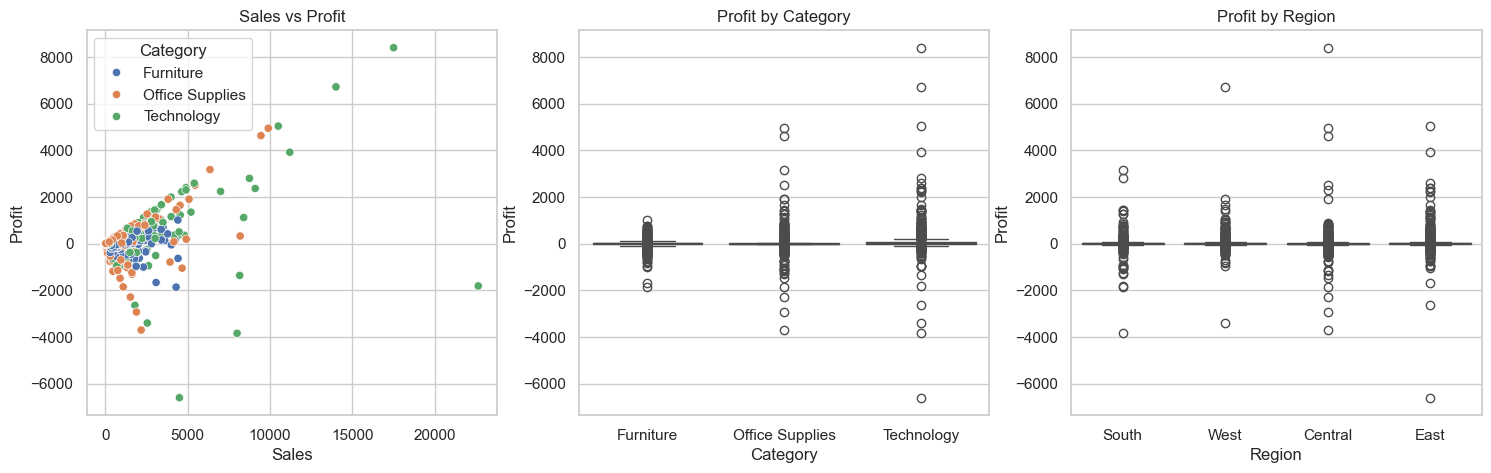

In [146]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Sales vs Profit
sns.scatterplot(data=sup, x='Sales', y='Profit', hue='Category', ax=axs[0])
axs[0].set_title('Sales vs Profit')
axs[0].set_xlabel('Sales')
axs[0].set_ylabel('Profit')

# Boxplot: Profit by Category
sns.boxplot(data=sup, x='Category', y='Profit', ax=axs[1])
axs[1].set_title('Profit by Category')
axs[1].set_xlabel('Category')
axs[1].set_ylabel('Profit')

# Boxplot: Profit by Category
sns.boxplot(data=sup, x='Region', y='Profit', ax=axs[2])
axs[2].set_title('Profit by Region')
axs[2].set_xlabel('Region')
axs[2].set_ylabel('Profit')

#### 1. Sales vs Profit by Category

- There is a **positive correlation** between sales and profit overall—higher sales tend to result in higher profits.
- Category-wise insights:
  - Technology: Generally yields the **highest profits**, especially at higher sales levels. Some extreme high-profit outliers exist.
  - Office Supplies: Shows a wide spread with many **negative profit** points, indicating inconsistency in profitability.
  - Furniture: Mostly clustered around **lower to moderate profits**, with some negative outliers.

**📝 Insight**:
*Technology products tend to be the most profitable, while Office Supplies show inconsistent returns and higher risk.*

#### 2. Profit by Category

- Technology has the **widest range** in profit values—both high gains and significant losses.
- Office Supplies shows more frequent negative profit values compared to the other categories.
- Furniture is relatively more stable but with limited high-profit opportunities.

**📝 Insight**:
*Technology offers high-profit potential but with higher variability. Office Supplies may require pricing or cost strategy revisions.*

#### 3. Profit by Region

- All four regions — South, West, Central, and East — show **similar profit distributions**.
- No region consistently outperforms the others.
- Each region has a few outliers with unusually high or low profit.

**📝 Insight**:
*Profitability appears to be consistent across regions. Strategic focus should be more on product category than location.*


---
## Monthly Sales Trend

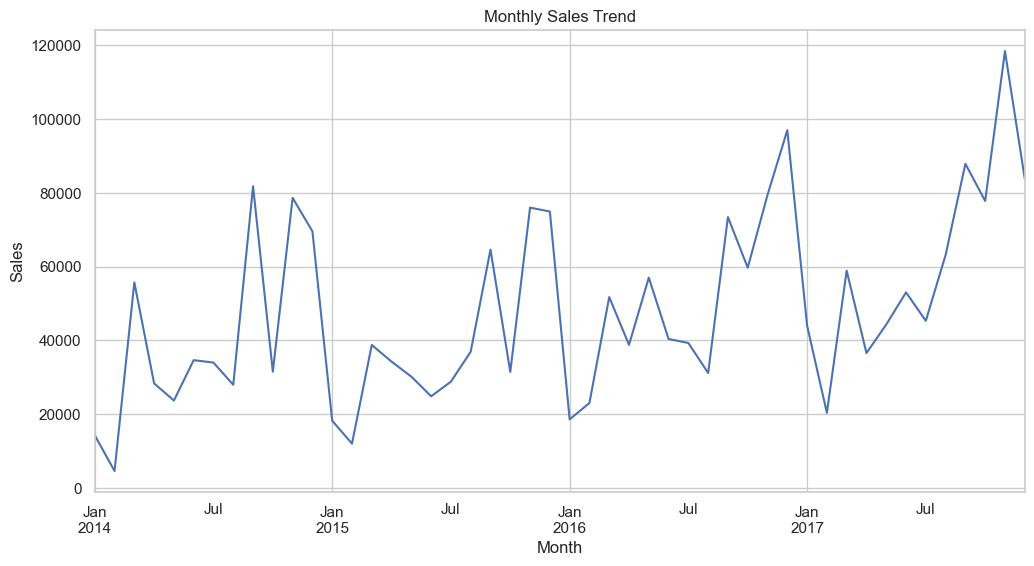

In [59]:

sup['Month'] = sup['Order Date'].dt.to_period('M')
monthly_sales = sup.groupby('Month')['Sales'].sum()

monthly_sales.plot(title='Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

- Overall Growth: Sales exhibit a clear **upward trend** from 2014 to 2017, indicating steady business growth over time.
- Seasonality: There are recurring **peaks around the end of each year**, especially noticeable in Q4, suggesting a **seasonal sales boost** (possibly due to holiday periods or end-of-year procurement).
- Volatility: Monthly sales figures show **significant fluctuations**, with some months experiencing sharp drops, indicating potential operational or market-driven impacts.

**📝 Insight:**

*Sales performance has generally improved over the years with a strong seasonal pattern. Understanding the drivers behind peak months can help optimize marketing and inventory strategies.*

---
## Sales and Profit by Region

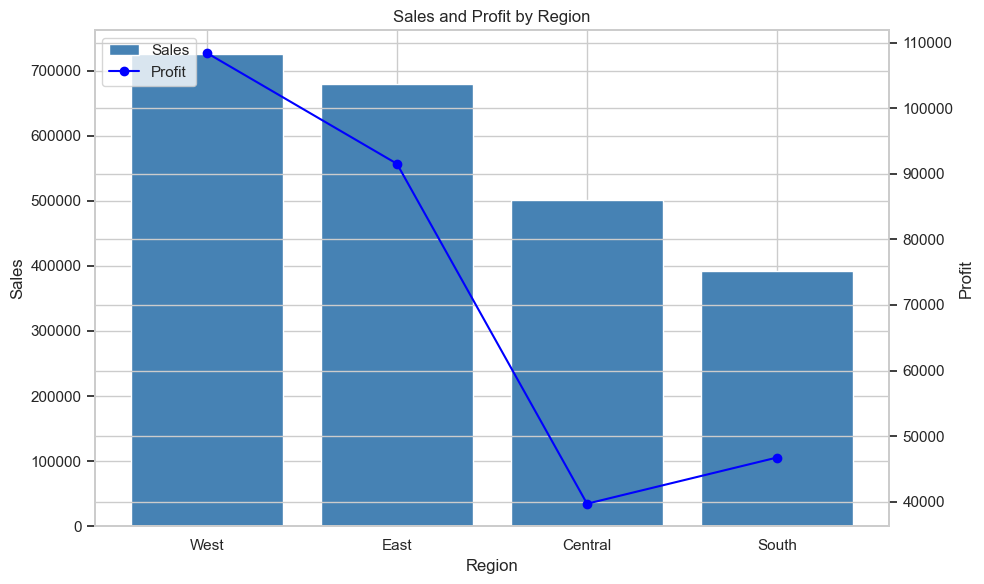

In [132]:
#Sales and Profit by Region
region_metrics = sup.groupby('Region')[['Sales', 'Profit']].sum().sort_values('Sales', ascending=False)

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(region_metrics.index, region_metrics['Sales'], color='steelblue', label='Sales')
ax1.set_ylabel('Sales')
ax1.set_xlabel('Region')
ax1.set_title('Sales and Profit by Region')

ax2 = ax1.twinx()
ax2.plot(region_metrics.index, region_metrics['Profit'], color='blue', marker='o', label='Profit')
ax2.set_ylabel('Profit')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.tight_layout()
plt.show()

- West region leads in both **sales** and **profit**, making it the top-performing region overall.
- East ranks second in sales and profit but shows a noticeable gap compared to the West.
- Central has **moderate sales** but the **lowest profit**, indicating high costs, low margins, or operational inefficiencies.
- South region, while having the **lowest sales**, performs **better in profit** than Central—suggesting more efficient operations or better margin control.

**📝 Insight**: 

*The West and East regions are strong markets in both revenue and profitability. However, the Central region underperforms in profit despite decent sales, highlighting a need for cost or pricing strategy adjustments.*

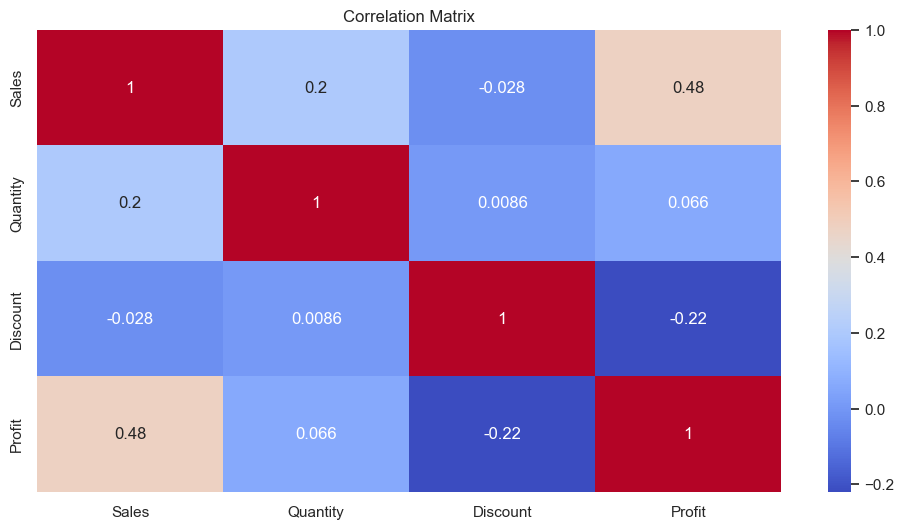

In [71]:
corr = sup[['Sales', 'Quantity', 'Discount', 'Profit']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Sales & Profit
- Correlation: 0.48 (Strong positive)  
- Interpretation: Higher sales strongly correlate with higher profits  
- Implication: Revenue growth directly drives profitability

#### Quantity & Profit  
- Correlation: 0.066 (Very weak)  
- Interpretation: Selling more units has minimal impact on profit  
- Implication: Volume-based strategies are less effective than value-based ones  

#### Discount & Profit  
- Correlation: -0.22 (Negative)  
- Interpretation: Discounts erode profit margins  
- Implication: Promotions reduce profitability without proportional benefits  

#### Discount & Sales  
- Correlation: -0.028 (Near-zero)  
- Interpretation: Discounts don't significantly boost sales volume  
- Implication: Discounts may be ineffective for demand generation  

#### Sales & Quantity  
- Correlation: 0.2 (Weak positive)  
- Interpretation: Higher sales slightly correlate with larger quantities  

**📝 Insight:**

1. Profit Optimization
   - Focus on revenue quality over quantity  
   - Implement premium pricing and upselling strategies  

2. Discount Strategy
   - Reduce reliance on price discounts  
   - Test value-added promotions (bundles, loyalty programs)  

3. Operational Efficiency
   - Audit cost structures for low-margin items  
   - Identify and address operational inefficiencies  

**Final Recommendation**: 
*Rebalance pricing strategies to maximize both sales growth and profit margins, reducing dependency on discount-driven sales.*